In [100]:
#Toygar Çaparoğlu
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<div style="text-align: center;">
<font face="Courier New" color="#f2f068" size="4"><b>
Task 4

Boxplot for Median value of owner-occupied homes

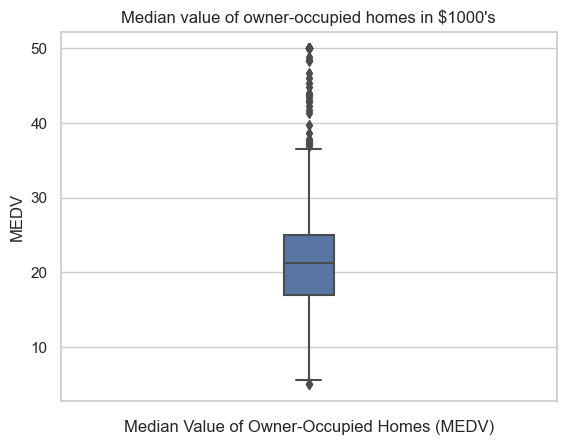

Quartile range is between around $17000 to $26000


In [47]:
plt.title("Median value of owner-occupied homes in $1000's")
sns.set(style="whitegrid")
sns.boxplot(y='MEDV',data=boston_df, width=0.1)
plt.xlabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()
print("Quartile range is between around $17000 to $26000")

Bar plot for the Charles river variable

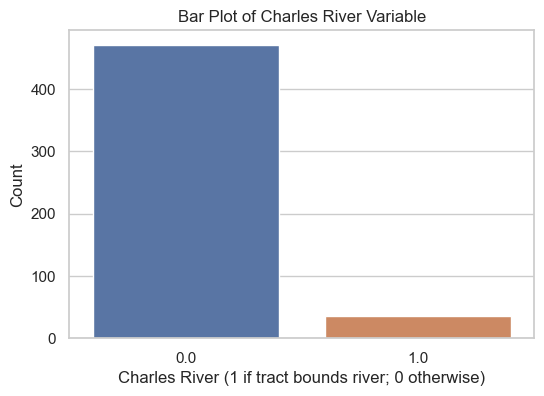

Charles River mostly does not tract bounds river


In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()
print("Charles River mostly does not tract bounds river")

Boxplot for the MEDV variable vs the AGE variable

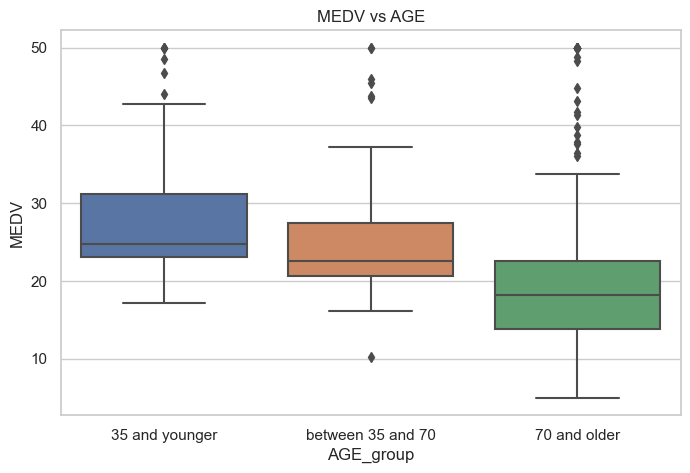

There is difference between the groups '35 and younger' and '70 and older' in terms of MEDV


In [50]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', 'between 35 and 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('MEDV vs AGE')
plt.show()
print("There is difference between the groups '35 and younger' and '70 and older' in terms of MEDV")

Scatter plot for the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

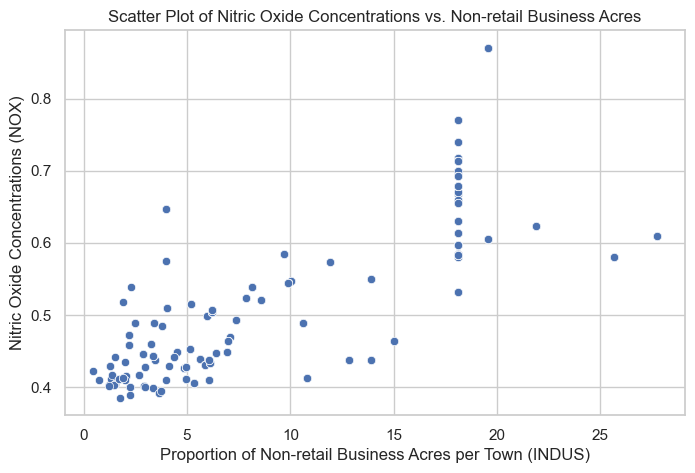

It looks like there is a small correlation


In [51]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Non-retail Business Acres')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()
print("It looks like there is a small correlation")

Histogram for the pupil to teacher ratio variable

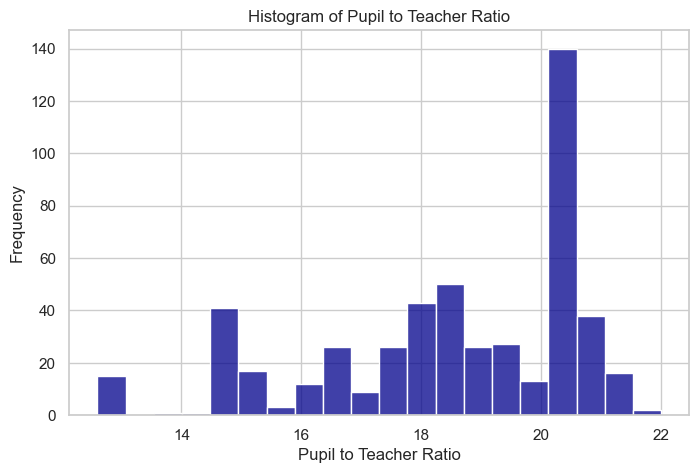

Pupil to teacher ratio is more frequent for the ratio 20 to 21


In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False, color='darkblue')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()
print("Pupil to teacher ratio is more frequent for the ratio 20 to 21")

<div style="text-align: center;">
<font face="Courier New" color="#f2f068" size="4"><b>
TASK 5

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [75]:
print("Null Hypothesis: There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the Charles River")
print("Alternative Hypothesis: There is a significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the Charles River")
print("")
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
print("Since p value is smaller than alpha, null hypothesis is rejected. There is a significant difference in median values.")

Null Hypothesis: There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the Charles River
Alternative Hypothesis: There is a significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the Charles River

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
Since p value is smaller than alpha, null hypothesis is rejected. There is a significant difference in median values.


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [76]:
print("Null Hypothesis: There is no significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940")
print("Alternative Hypothesis: There is a significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940")
print("")
grouped_data = [boston_df[boston_df['AGE'] == category]['MEDV'] for category in boston_df['AGE'].unique()]
f_stat, p_value = f_oneway(*grouped_data)
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')
print("Since p value is bigger than alpha, null hypothesis remains. There is no significant difference in median values across different proportions of AGE.")

Null Hypothesis: There is no significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940
Alternative Hypothesis: There is a significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940

F-statistic: 0.9840091646131573
P-value: 0.5539698276810093
Since p value is bigger than alpha, null hypothesis remains. There is no significant difference in median values across different proportions of AGE.


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [88]:
print("Null Hypothesis: There is no significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
print("Alternative Hypothesis: There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
print("")
corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson Correlation Coefficient: {corr_coeff}')
print(f'P-value: {p_value}')
print("Since p value is smaller than alpha, null hypothesis is rejected. There is a strong significant linear relationship between NOX and INDUS.")

Null Hypothesis: There is no significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
Alternative Hypothesis: There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Pearson Correlation Coefficient: 0.7636514469209162
P-value: 7.913361061232958e-98
Since p value is smaller than alpha, null hypothesis is rejected. There is a strong significant linear relationship between NOX and INDUS.


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [99]:
print("Null Hypothesis: There is no significant linear relationship between weighted distance to employment centers (DIS) and median value of owner-occupied homes (MEDV).")
print("Alternative Hypothesis: There is a significant linear relationship between weighted distance to employment centers (DIS) and median value of owner-occupied homes (MEDV).")
print("")
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
print(model.summary())
print("")
print("The regression analysis indicates a statistically significant relationship between the weighted distance to employment centers (DIS) and the median value of owner-occupied homes (MEDV). The positive coefficient for DIS suggests that, on average, an increase in the weighted distance to employment centers is associated with an increase in the median value of owner-occupied homes. However, the low R-squared value indicates that the model may not explain a substantial portion of the variability in MEDV.")

Null Hypothesis: There is no significant linear relationship between weighted distance to employment centers (DIS) and median value of owner-occupied homes (MEDV).
Alternative Hypothesis: There is a significant linear relationship between weighted distance to employment centers (DIS) and median value of owner-occupied homes (MEDV).

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        18:39:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                        